In [2]:
# importing nacessary libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# reading the .pkl file which containes the list of features required
df = pd.read_pickle("merged_all_table.pkl", compression='bz2')

In [4]:
# checking the shape of the data
df.shape

(25979, 66)

In [5]:
# checking for null values
df.isna().sum()

match_api_id                            0
goal                                11762
shoton                              11762
shotoff                             11762
foulcommit                          11762
card                                11762
cross                               11762
corner                              11762
possession                          11762
B365H                                3387
B365D                                3387
B365A                                3387
BWH                                  3404
BWD                                  3404
BWA                                  3404
IWH                                  3459
IWD                                  3459
IWA                                  3459
LBH                                  3423
LBD                                  3423
LBA                                  3423
PSH                                 14811
PSD                                 14811
PSA                               

# Preprocessing

In [6]:
# creating a deep copy of match 
match_df = df.copy()

In [7]:
match_df.columns

Index(['match_api_id', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
       'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
       'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'league_name', 'country_name',
       'team_api_id', 'team_long_name', 'team_short_name',
       'team_overall_score', 'home_total_goal', 'away_total_goal',
       'home_players_avg_overall_rating', 'home_players_avg_overall_score',
       'home_players_avg_ideal_body_rate', 'away_players_avg_overall_rating',
       'away_players_avg_overall_score', 'away_players_avg_ideal_body_rate',
       'home_total_win', 'home_total_loose', 'home_total_draw',
       'away_total_win', 'away_total_loose', 'away_total_draw',
       'league_home_total_win', 'league_home_total_loose',
       'league_home_total_draw', 'league_away_total_win',
       'league_a

In [8]:
# #droping some columns
# cols_to_drop =['match_api_id' ,'home_team_api_id' ,'away_team_api_id','PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA','home_player_X1' ,'home_player_X2' ,'home_player_X3' ,'home_player_X4' ,'home_player_X5' ,'home_player_X6' ,
#                'home_player_X7' ,'home_player_X8' ,'home_player_X9' ,'home_player_X10' ,'home_player_X11' ,'away_player_X1' ,'away_player_X2' ,
#                'away_player_X3' ,'away_player_X4' ,'away_player_X5' ,'away_player_X6' ,'away_player_X7' ,'away_player_X8' ,'away_player_X9' ,
#                'away_player_X10' ,'away_player_X11' ,'home_player_Y1' ,'home_player_Y2' ,'home_player_Y3' ,'home_player_Y4' ,'home_player_Y5' ,
#                'home_player_Y6' ,'home_player_Y7' ,'home_player_Y8' ,'home_player_Y9' ,'home_player_Y10' ,'home_player_Y11' ,'away_player_Y1' ,
#                'away_player_Y2' ,'away_player_Y3' ,'away_player_Y4' ,'away_player_Y5' ,'away_player_Y6' ,'away_player_Y7' ,'away_player_Y8' ,
#                'away_player_Y9' ,'away_player_Y10' ,'away_player_Y11' ,'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' ,
#                'possession','season', 'stage', 'date','country_name', 'league_name','season','stage','date',"goal", "shoton", "shotoff", "foulcommit", "card", "cross", "corner", "possession"]
# match_df.drop(columns=cols_to_drop, inplace = True)

# # before removing bets
# cols_to_drop =['match_api_id' ,'PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA',
#                'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
#                'country_name', 'league_name', 'team_long_name', 'team_short_name']
# match_df.drop(columns=cols_to_drop, inplace = True)

# removing bets too
cols_to_drop =['match_api_id' , 'B365H', 'B365D', 'B365A', 'BWH',
                'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
                'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
                'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'team_api_id',
               'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
               'country_name', 'league_name', 'team_long_name', 'team_short_name']
match_df.drop(columns=cols_to_drop, inplace = True)

In [9]:
# shape after dropping columns
match_df.shape

(25979, 22)

In [10]:
# creating input and output for the model
X = match_df.drop(columns=['target'])
y= match_df[['target']]

In [11]:
# input shape
X.shape

(25979, 21)

In [12]:
# checking for data types
X.dtypes

team_overall_score                  float64
home_total_goal                       int64
away_total_goal                       int64
home_players_avg_overall_rating     float64
home_players_avg_overall_score      float64
home_players_avg_ideal_body_rate    float64
away_players_avg_overall_rating     float64
away_players_avg_overall_score      float64
away_players_avg_ideal_body_rate    float64
home_total_win                        int64
home_total_loose                      int64
home_total_draw                       int64
away_total_win                        int64
away_total_loose                      int64
away_total_draw                       int64
league_home_total_win                 int64
league_home_total_loose               int64
league_home_total_draw                int64
league_away_total_win                 int64
league_away_total_loose               int64
league_away_total_draw                int64
dtype: object

## Handling Missing Values

In [13]:
# handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Perform missing value imputation using 'mean' strategy for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X = numeric_imputer.fit_transform(X)
sc = StandardScaler()
X_preprocess = sc.fit_transform(X)
le = LabelEncoder()
y_le_encoded = le.fit_transform(y)

c:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    # SVC(),
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    LGBMClassifier()
]
# Loop through each classifier and compute the accuracy
for classifier in classifiers:
    scores = cross_val_score(classifier,X_preprocess, y_le_encoded, cv=5)
    avg_accuracy = scores.mean()
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {avg_accuracy}\n")

Classifier: LogisticRegression
Accuracy: 0.5371261894653546

Classifier: DecisionTreeClassifier
Accuracy: 0.3980529036550659

Classifier: GaussianNB
Accuracy: 0.5044844964772636

Classifier: RandomForestClassifier
Accuracy: 0.48535477427294704

Classifier: XGBClassifier
Accuracy: 0.48935789061104973

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2409
[LightGBM] [Info] Number of data points in the train set: 20783, number of used features: 21
[LightGBM] [Info] Start training from score -1.246886
[LightGBM] [Info] Start training from score -1.370967
[LightGBM] [Info] Start training from score -0.779271
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory i

In [16]:
# only bets features
# Classifier: LogisticRegression
# Accuracy: 0.5200735666215441

# added 'country_id' ,'league_id' ,'season' ,'stage' with bets
# Classifier: LogisticRegression
# Accuracy: 0.4584877313636536

# with bets
# Classifier: LogisticRegression
# Accuracy: 0.5321219921150571

# Classifier: DecisionTreeClassifier
# Accuracy: 0.3985523698173097

# Classifier: GaussianNB
# Accuracy: 0.3997069041781603

# Classifier: SVC
# Accuracy: 0.5260017070953372

# Classifier: RandomForestClassifier
# Accuracy: 0.49928845836102553

# Classifier: XGBClassifier
# Accuracy: 0.48962709154372847

# Classifier: LGBMClassifier
# Accuracy: 0.5067175535189948

In [17]:
def calculate_performance_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate performance metrics
    accuracy = cm.diagonal().sum() / cm.sum()
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

In [18]:
def print_cm(y_test,y_pred):
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [19]:
def feature_importance(model_name):
    # plotting the important features from the input for better understanding
    importances= model_name.feature_importances_
    forest_importances = pd.Series(importances, index=(match_df.drop(columns=['target'])).columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(forest_importances)
    ax.set_title("Feature importances")
    ax.set_ylabel("FI")
    fig.tight_layout()

### Train Test split for the Models

In [20]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocess,y_le_encoded, stratify=y_le_encoded, test_size=0.3, random_state=42)

## Running SMOTE
In this section we are trying to use SMOTE technique which is a oversampling technique to balance the classes and run logistic regression to see if there is any changes to the accuracy of the model.

In [21]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_train_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

In [61]:
len(X_train_oversampled),len(X_train)

(25026, 18185)

In [62]:
np.unique(y_oversampled, return_counts=True)

(array([0, 1, 2]), array([8342, 8342, 8342], dtype=int64))

In [63]:
## Lets do the logistic regression
# checking using randomforest
lr = LogisticRegression()
lr.fit(X_train_oversampled,y_oversampled)

# predicting using LGBM model
y_pred_lr_smote = lr.predict(X_test)

In [64]:
# checking for the accuracy
lr.score(X_test,y_test)

0.4947395432383885

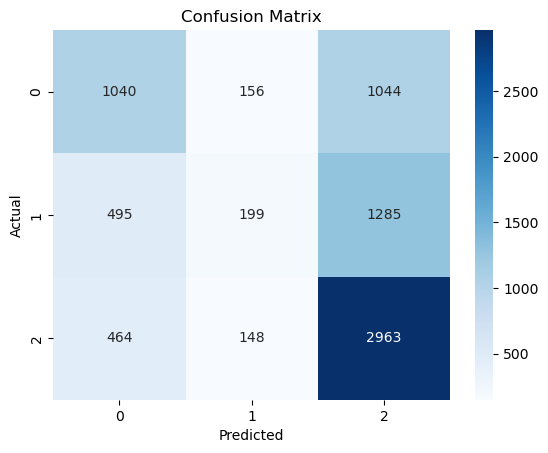

In [60]:
print_cm(y_test,y_pred_lr_smote)

## Checking LGBM

In [22]:
# defining the LGBM model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

# predicting using LGBM model
y_pred_lgbm = lgbm_classifier.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2495
[LightGBM] [Info] Number of data points in the train set: 18185, number of used features: 21
[LightGBM] [Info] Start training from score -1.246951
[LightGBM] [Info] Start training from score -1.370852
[LightGBM] [Info] Start training from score -0.779294


In [23]:
# checking for the accuracy
lgbm_classifier.score(X_test,y_test)

0.5216833461637157

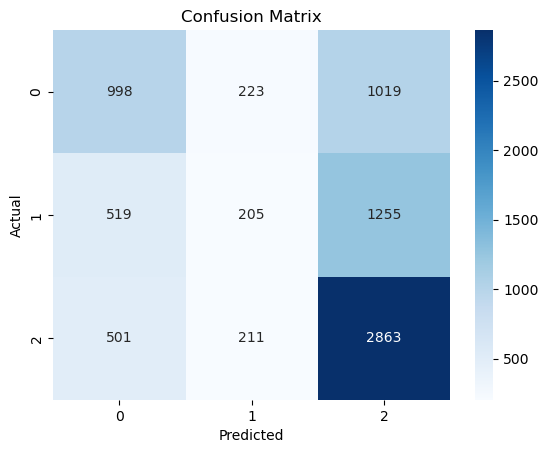

In [24]:
print_cm(y_test,y_pred_lgbm)

In [25]:
calculate_performance_metrics(y_test,y_pred_lgbm)

Accuracy: 0.5216833461637157
Precision: 0.4792317378680735
Recall: 0.5216833461637157
F1 Score: 0.475961592024128


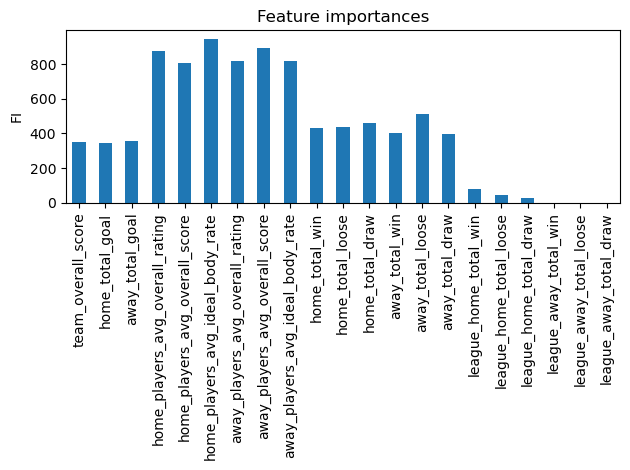

In [26]:
feature_importance(lgbm_classifier)

## Checking Random Forest

In [27]:
# checking using randomforest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# predicting using LGBM model
y_pred_rf = rf.predict(X_test)

In [28]:
# checking for the accuracy
rf.score(X_test,y_test)

0.4912753400051322

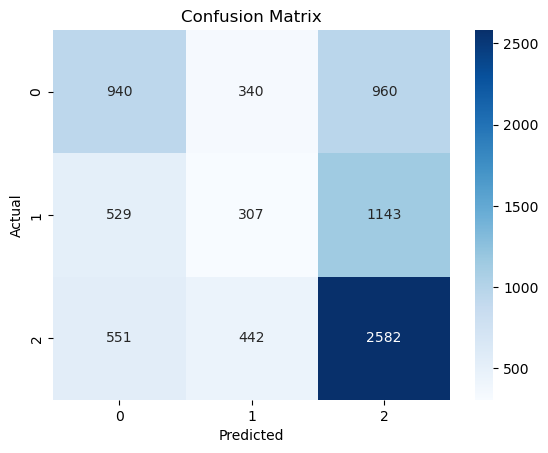

In [29]:
print_cm(y_test,y_pred_rf)

In [30]:
calculate_performance_metrics(y_test,y_pred_rf)

Accuracy: 0.4912753400051322
Precision: 0.4581129435979713
Recall: 0.4912753400051322
F1 Score: 0.46441196205632046


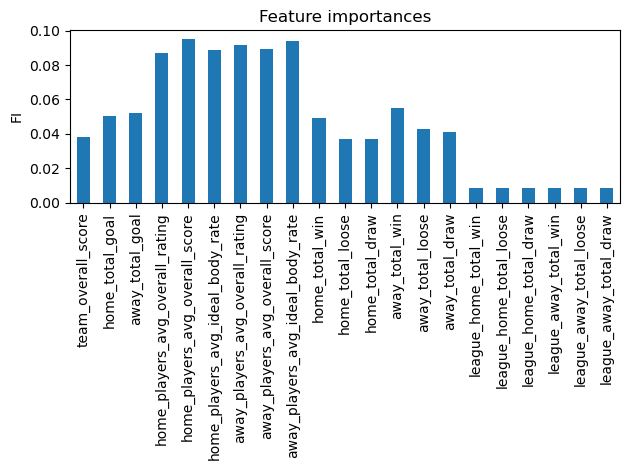

In [31]:
feature_importance(rf)

## Checking Logistic Regression

In [32]:
# checking using randomforest
lr = LogisticRegression()
lr.fit(X_train,y_train)

# predicting using LGBM model
y_pred_lr = lr.predict(X_test)

In [33]:
# checking for the accuracy
lr.score(X_test,y_test)

0.5391326661534513

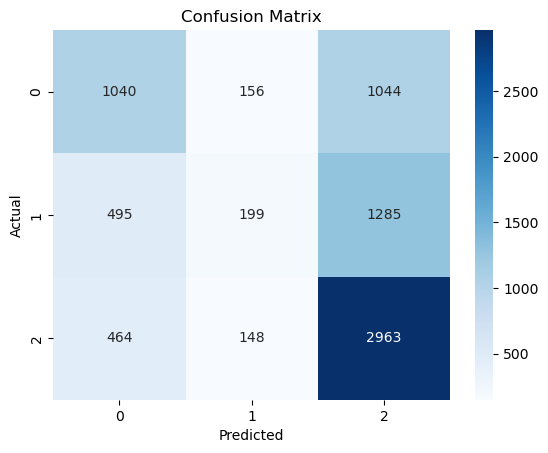

In [34]:
print_cm(y_test,y_pred_lr)

In [35]:
calculate_performance_metrics(y_test,y_pred_lr)

Accuracy: 0.5391326661534513
Precision: 0.5067969900414767
Recall: 0.5391326661534513
F1 Score: 0.48828784416794513


## Checking Decision Classifier

In [36]:
# checking using randomforest
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# predicting using LGBM model
y_pred_dt = dt.predict(X_test)

In [37]:
# checking for the accuracy
dt.score(X_test,y_test)

0.4053117782909931

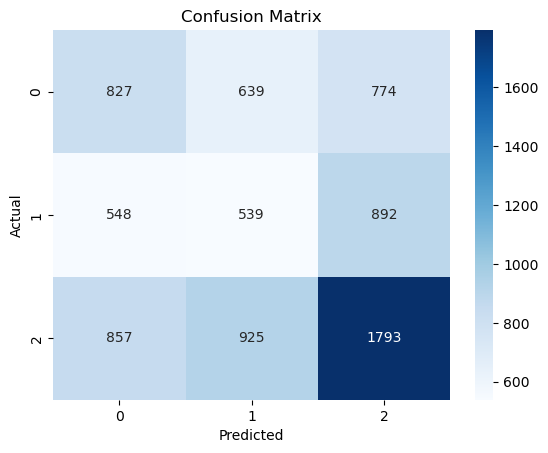

In [38]:
print_cm(y_test,y_pred_dt)

In [39]:
calculate_performance_metrics(y_test,y_pred_dt)

Accuracy: 0.4053117782909931
Precision: 0.4093292802216927
Recall: 0.4053117782909931
F1 Score: 0.4071946410008623


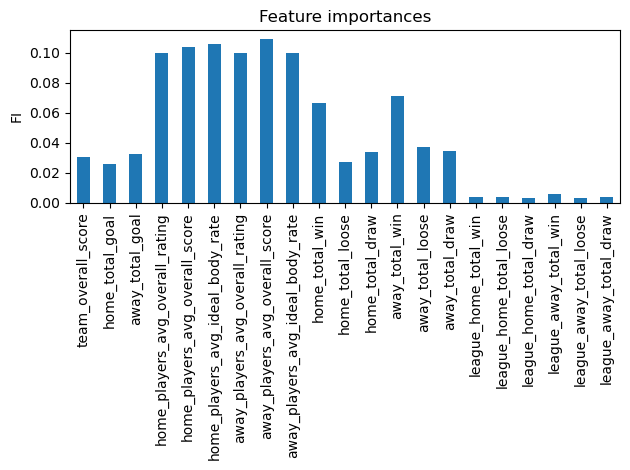

In [40]:
feature_importance(dt)

## Checking Naive Bays

In [41]:
# checking using randomforest
nb = GaussianNB()
nb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_nb = nb.predict(X_test)

In [42]:
# checking for the accuracy
nb.score(X_test,y_test)

0.5132152938157557

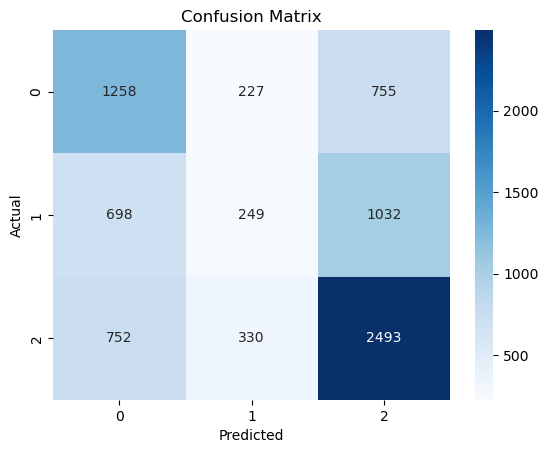

In [43]:
print_cm(y_test,y_pred_nb)

In [44]:
calculate_performance_metrics(y_test,y_pred_nb)

Accuracy: 0.5132152938157557
Precision: 0.4791279478859463
Recall: 0.5132152938157557
F1 Score: 0.4826966479175741


## Checking SVC

In [45]:
# checking using randomforest
svc = SVC()
svc.fit(X_train,y_train)

# predicting using LGBM model
y_pred_svc = svc.predict(X_test)

In [46]:
# checking for the accuracy
svc.score(X_test,y_test)

0.5322042596869386

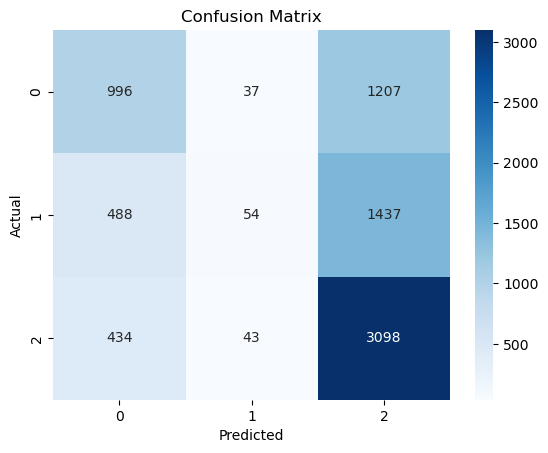

In [47]:
print_cm(y_test,y_pred_svc)

In [48]:
calculate_performance_metrics(y_test,y_pred_svc)

Accuracy: 0.5322042596869386
Precision: 0.4990442082554792
Recall: 0.5322042596869386
F1 Score: 0.4557008091121701


## Checking XGB

In [49]:
# checking using randomforest
xb = xgb.XGBClassifier()
xb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_xb = xb.predict(X_test)

In [50]:
# checking for the accuracy
xb.score(X_test,y_test)

0.5127020785219399

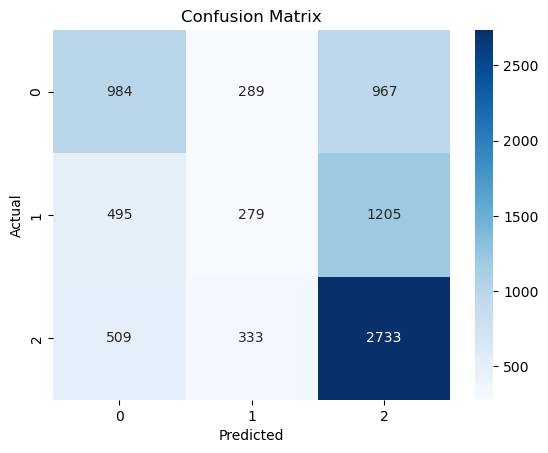

In [51]:
print_cm(y_test,y_pred_xb)

In [52]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.5127020785219399
Precision: 0.47645411744797955
Recall: 0.5127020785219399
F1 Score: 0.4786294031233348


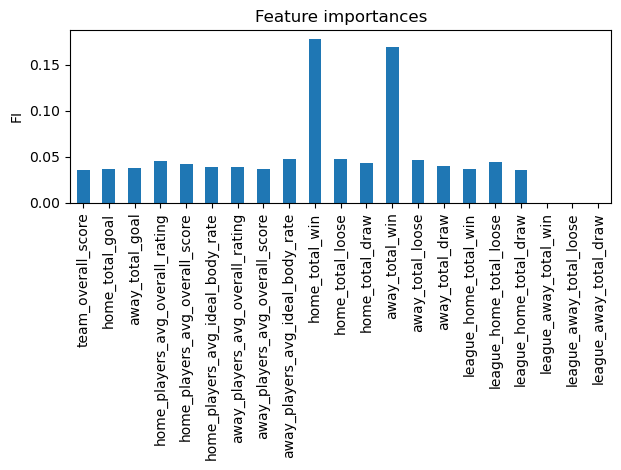

In [53]:
feature_importance(xb)

## Neural Network Model (Test)

In [54]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [55]:
# Create an instance of the OneHotEncoder
oh = OneHotEncoder()

# Fit and transform the categorical data
oh_encoded = oh.fit_transform(y_train.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded = oh_encoded.toarray()

# Fit and transform the categorical data
oh_encoded_test = oh.fit_transform(y_test.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded_test = oh_encoded_test.toarray()

In [66]:
# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(518, activation='relu', input_shape=(21,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 518)               11396     
                                                                 
 dropout_3 (Dropout)         (None, 518)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               132864    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 24)               

In [68]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
# Train the model
model.fit(X_train, oh_encoded, epochs=50, batch_size=24)

Epoch 1/50
758/758 [==============================] - 2s 2ms/step - loss: 0.9862 - accuracy: 0.5244
Epoch 2/50
758/758 [==============================] - 2s 2ms/step - loss: 0.9735 - accuracy: 0.5325
Epoch 3/50
758/758 [==============================] - 1s 2ms/step - loss: 0.9690 - accuracy: 0.5381
Epoch 4/50
758/758 [==============================] - 2s 2ms/step - loss: 0.9667 - accuracy: 0.5395
Epoch 5/50
758/758 [==============================] - 3s 4ms/step - loss: 0.9649 - accuracy: 0.5385
Epoch 6/50
758/758 [==============================] - 3s 4ms/step - loss: 0.9642 - accuracy: 0.5415
Epoch 7/50
758/758 [==============================] - 5s 7ms/step - loss: 0.9625 - accuracy: 0.5407
Epoch 8/50
758/758 [==============================] - 5s 7ms/step - loss: 0.9612 - accuracy: 0.5424
Epoch 9/50
758/758 [==============================] - 5s 7ms/step - loss: 0.9593 - accuracy: 0.5419
Epoch 10/50
758/758 [==============================] - 5s 6ms/step - loss: 0.9582 - accuracy: 0.5440

In [70]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, oh_encoded_test)

244/244 [==============================] - 1s 2ms/step - loss: 1.1409 - accuracy: 0.5000


In [71]:
# Make predictions
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)

244/244 [==============================] - 0s 1ms/step


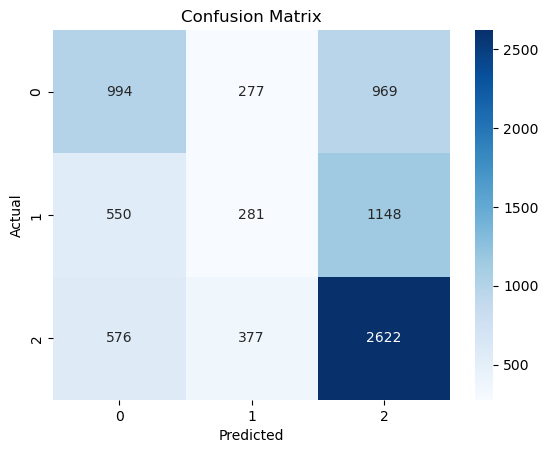

In [72]:
print_cm(y_test,predicted_labels)

In [73]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.5127020785219399
Precision: 0.47645411744797955
Recall: 0.5127020785219399
F1 Score: 0.4786294031233348
